1. Importation des bibliothèques

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,8)


2. Importations des données

In [179]:
df= pd.read_csv('C:/Users/HP/Downloads/movies.csv~/movies.csv')
#Affichage de l'entête
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00


3. Verification de la presence des valeurs manquantes

In [180]:

missing_val_prcent= []
print('Le pourcentage des valeurs manquantes pour chaque colonne est de :\n')
for col in df.columns:
    miss_values=np.mean(df[col].isnull())
    print('{} : {}%'.format(col, miss_values))
#SUppression des valeurs manquantes
df.dropna(inplace=True)

Le pourcentage des valeurs manquantes pour chaque colonne est de :

name : 0.0%
rating : 0.010041731872717789%
genre : 0.0%
year : 0.0%
released : 0.0002608242044861763%
score : 0.0003912363067292645%
votes : 0.0003912363067292645%
director : 0.0%
writer : 0.0003912363067292645%
star : 0.00013041210224308815%
country : 0.0003912363067292645%
budget : 0.2831246739697444%
gross : 0.02464788732394366%
company : 0.002217005738132499%
runtime : 0.0005216484089723526%


On constate que les années entre les colones 'year' et 'released' ne correspondent pas, d'où nous devons considerer que l'année de sortie du film. Autrement dit, on doit avoir une colonne qui n'affiche que l'année de sortie du film plutot que la date

In [181]:

def suppression (x):
    index = x.find(' (')
    if index != -1:
        return x[:index + 1]
    else:
        return x
    #Cette fonction supprime tous les caractères à partir de la parenthèses 
df['released year'] = df["released"].apply(suppression)
def annee(x):
    return x[-5:-1]
#Cette fonction nous retourne l'année
df['released year'] = df["released year"].apply(annee)

df['released year'] = df['released year'].astype('int64')



Ordonnons le Tableau selon le revenu des films(Colonne 'gross')

In [182]:
pd.options.display.float_format = '{:.2f}'.format
tri_selon_gross = df.sort_values(by=['gross'], inplace=False,ascending=False)
tri_selon_gross.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00,2018


4. DEBUT DU PROJET

4.1 Quelle est la durée moyenne des films?

In [183]:
duree_moyenne = df['runtime'].mean()

# Affichage avec deux décimales
print(f"La durée moyenne des films est de {duree_moyenne:.2f} minutes")

La durée moyenne des films est de 108.15 minutes


4.2 Quel est le nombres de films ont été produits par chaque pays?

4.2.1 Pour cela on doit d'abord créér une colonne des pays

In [184]:
def pays (x):
    index = x.find(' (')
    if index != -1:
        return x[index +2 :-1]
df["country"] = df['released'].apply(pays)

In [185]:
# Groupement par pays et comptage du nombre de films
films_par_pays = df.groupby('country').size()
print(films_par_pays.sort_values(ascending=False).head())#Affichage de l'entête

country
United States     5076
United Kingdom      87
France              41
Germany             25
Spain               14
dtype: int64


4.3 Quel est le nombre de films ont été réalisé par "Christopher Nolan" ?

4.3.1 Pour cela on doit deja regrouper le nombre de films produits par chaque réalisateurs

In [186]:
films_par_real = df.groupby('director').size()
print("Le nombre de films réalisés par Nolan sont au nombre de",films_par_real.loc['Christopher Nolan'])

Le nombre de films réalisés par Nolan sont au nombre de 11


4.4 Quel est le nombre de films sorti après l'an 2000 présent dans notre dataset?

In [187]:
df["released year"].astype("int64")
films_sorti_apres_2000 = df[df["released year"]>2000].reset_index()
print("Le nombre de films sorti après l'an 2000 est de",len(films_sorti_apres_2000))

Le nombre de films sorti après l'an 2000 est de 3029


4.5 Quels sont les les cinq films les mieux notés

4.5.1 On va d'abord ordonner de manière descendante la table selon les votes

In [188]:

df_sorted = df.sort_values(by=['votes'], ascending=False)
#Puis on affiche ces films
cinq_films = df_sorted["name"].head().values
print("les films les mieux notés sont \n")
print(cinq_films)

les films les mieux notés sont 

['The Dark Knight' 'The Shawshank Redemption' 'Inception' 'Forrest Gump'
 'Fight Club']


4.6 Ajout d'une nouvelle colonne profit qui calcule la différence entre 'gross' et 'budget'.

In [189]:
df["profit"] = df['gross'] - df['budget']


4.7 Convertir la colonne 'release' en format >datetime< pour avoir une meilleure lisibilité des dates

In [190]:
def suppression (x):
    index = x.find(' (')
    if index != -1:
        return x[:index + 1]
    else:
        return x
    #Cette fonction supprime tous les caractères à partir de la parenthèses 
df['released'] = df["released"].apply(suppression)
def point (x):
    return x.replace(':','').strip()
df["released"] = df["released"].apply(point)
df['released'] = pd.to_datetime(df['released'], format ='mixed')

df["released"].head()


0   1980-06-13
1   1980-07-02
2   1980-06-20
3   1980-07-02
4   1980-07-25
Name: released, dtype: datetime64[ns]

4.8 Calcul du budget moyen des films selon leur genre

In [191]:
budget_par_genre = df.groupby('genre')["budget"].mean()
print(budget_par_genre.sort_values(ascending=False))

genre
Animation   76323357.40
Action      58468560.47
Family      51125000.00
Adventure   45958899.08
Mystery     31876470.65
Biography   25441668.06
Sci-Fi      24416666.67
Romance     24040000.00
Drama       23241877.16
Comedy      22802371.80
Crime       22602897.44
Fantasy     17224390.24
Horror      13434529.88
Thriller    12742857.14
Western     10500000.00
Name: budget, dtype: float64


4.8 Affichage du nombre total de votes (votes) par année (year)

In [192]:
vote_par_an = df.groupby('year')["votes"].sum()
vote_par_an.head()

year
1980   3795865.00
1981   2699432.00
1982   3999721.00
1983   3714135.00
1984   5357494.00
Name: votes, dtype: float64

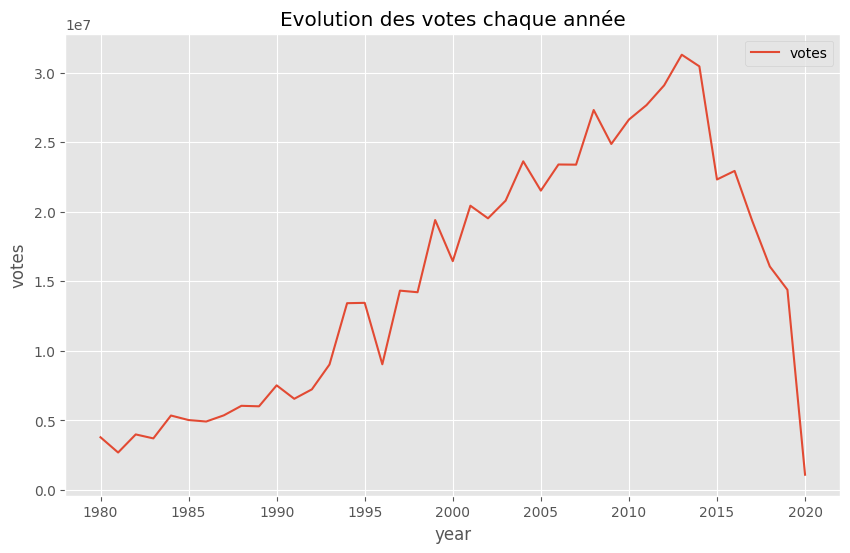

In [193]:
#On peut egalement avoir un visuel de cette série chronologique
vote_par_an.plot(figsize=(10, 6), legend=True)
plt.xlabel('year')
plt.ylabel('votes')
plt.title('Evolution des votes chaque année')
plt.grid(True)
plt.show()

4.9 Affichage du score moyen par directeur

In [194]:
score_par_directeur = df.groupby('director')["score"].mean().sort_values(ascending=False)
pd.set_option("display.max_rows",None)
score_par_directeur.head()

director
Roberto Benigni   8.60
Tony Kaye         8.50
Nadine Labaki     8.40
Bob Persichetti   8.40
Sergio Leone      8.40
Name: score, dtype: float64

4.10 Tracé d'un histogramme de la distribution des notes (rating).

<Axes: >

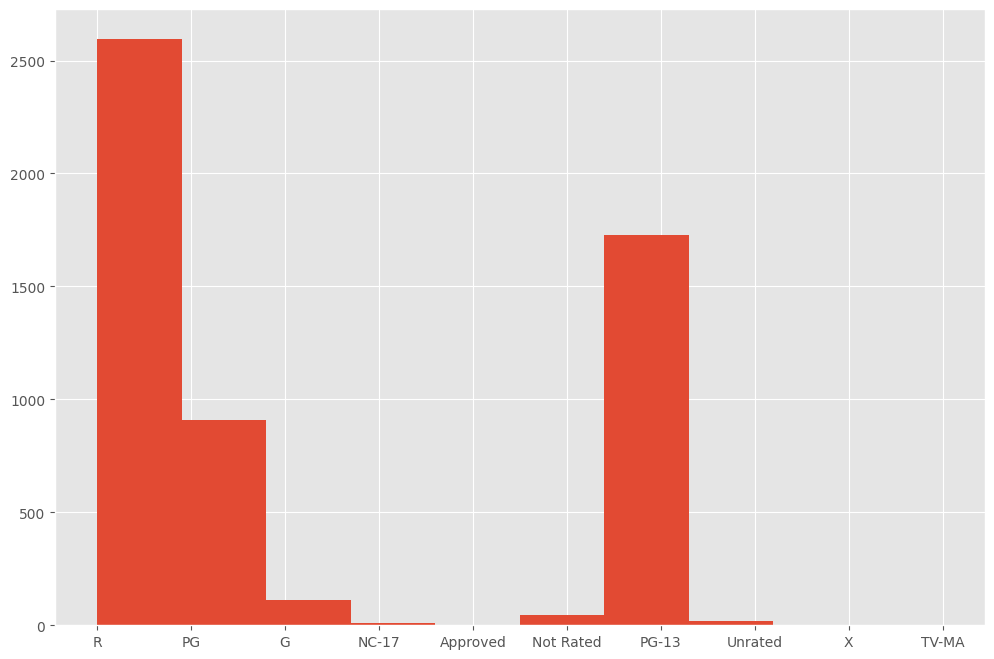

In [195]:
df['rating'].hist()
#On observe que les films classés R sont les plus nombreux, suivit des films PG-13

4.11 Graphique en ligne montrant l'évolution du gross moyen par année (year).

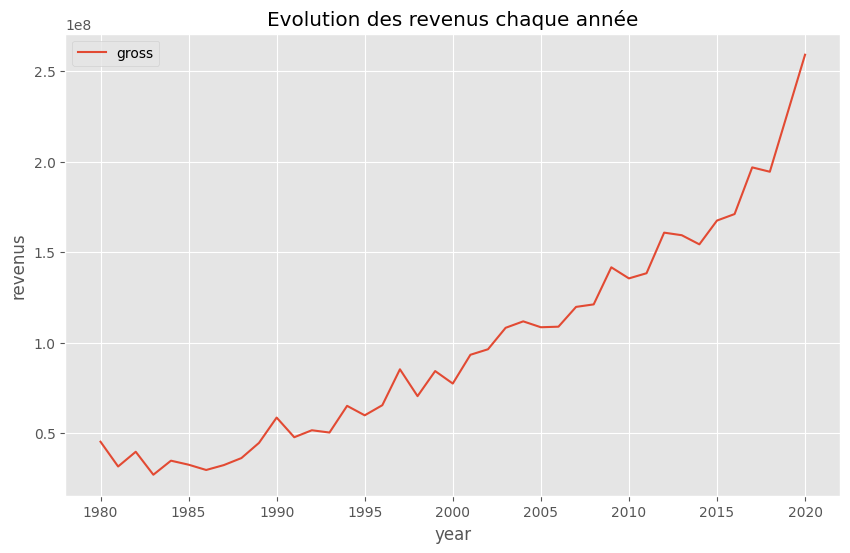

In [196]:
gross_par_an = df.groupby("released year")["gross"].mean()
gross_par_an.plot(figsize=(10, 6), legend=True)
plt.xlabel('year')
plt.ylabel('revenus')
plt.title('Evolution des revenus chaque année')
plt.show()

4.12 Analyse de l'existence de corrélation entre le budget(budget) et le revenu(gross)

0.7402465439219634

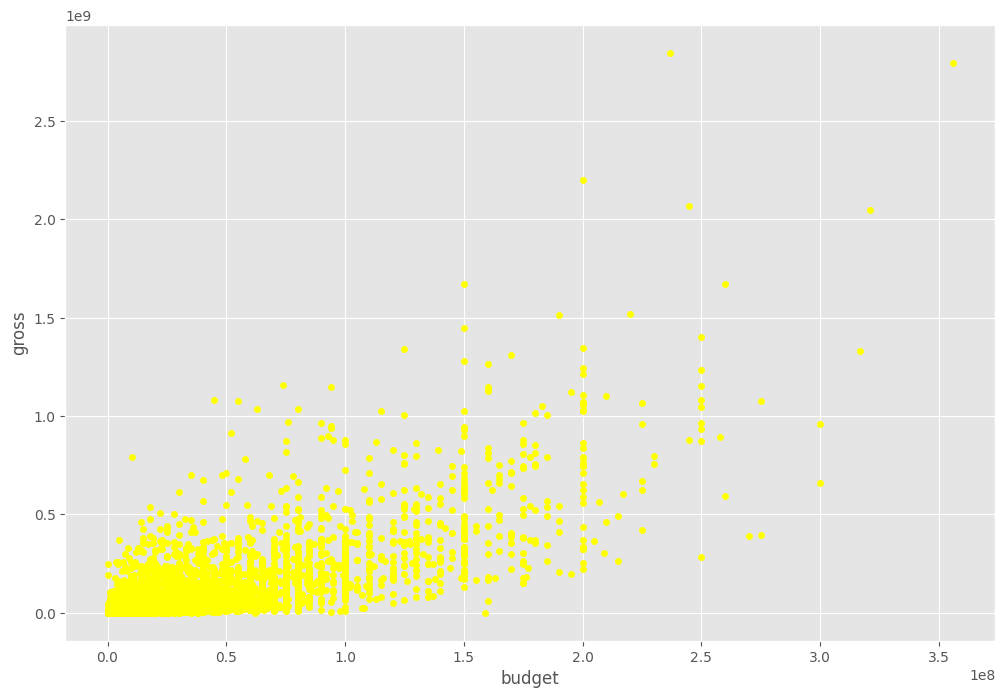

In [197]:
#Commençons par afficher le nuage de points des deux colonnes
df.plot.scatter("budget", "gross", color = "yellow")
#Pour analyser le coefficient de corrélation, nous allons utiliser le coefficient de corrélation de Pearson
import math
(df["budget"].corr(df["gross"]))

#Le coefficient de corrélation associé à ces deux colonnes vaut 0.74, et son carré vaut 0.86, nous pouvons donc conclure à une relation linéaire assez forte.

4.13 Entraînement d'un modèle de régression linéaire pour prédire le gross en utilisant (budget), (votes), et (runtime) comme variables explicatives.

In [198]:
#On crée un nouveau dataframe qui ne contiendra que les variables que nous utiliserons pour l'entraînement de notre modèle
X=df[["budget","votes",'runtime']]
y=df["gross"]
import statsmodels.api as sm
model = sm.OLS(y,X)#Ceci est notre modèle de régression linéaire
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  gross   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              4983.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                        0.00
Time:                        01:40:30   Log-Likelihood:                     -1.0808e+05
No. Observations:                5421   AIC:                                  2.162e+05
Df Residuals:                    5418   BIC:                                  2.162e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         2.6594      0.041     65.241      0.000       2.580       2.739
votes        373.2915      9.151     40.792      0.000     355.352     391.231
runtime     -3.31e+05   1.94e+04    -17.080      0.000   -3.69e+05   -2.93e+05
==============================================================================
Omnibus:                     4636.295   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416797.794
Skew:                           3.603   Prob(JB):                         0.00
Kurtosis:                      45.348   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On constate que notre modèle de régression explique 73.4% de la variance de la variable 'gross' tout en ayant des coefficients associés aux variables explicatives significatifs.

4.14 On passe desormais à une classification pour prédire si un film aura une note supérieur à 7 en fonction des autres variables

In [199]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
def superieur_a_sept(x):
    if(x<7):
        return 0
    else :
        return 1
y=df['score'].apply(superieur_a_sept)
y.name = 'score'
X=df.drop(['year','released','name','score'],axis=1)
X_encoded = pd.get_dummies(X,columns=["rating",'genre','director','writer','country','company','star']).astype(int)
#Apres avoir encodé nos variables catégorielles, on supprime la variable associéd à la classe majoritaire de chacune des variables
sup_col = ['director_Woody Allen','writer_Woody Allen','country_United States','company_Universal Pictures','star_Nicolas Cage']
for col in sup_col:
    X_encoded.drop(columns=col,inplace=True)
#On ajuste Desormais notre modele d'arbre de decision
model = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=5)  # La profondeur de l'arbre est reglée à 

model.fit(X_encoded,y)
y_pred=model.predict(X_encoded)
print(classification_report(y,y_pred))



              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3853
           1       0.75      0.62      0.68      1568

    accuracy                           0.83      5421
   macro avg       0.80      0.77      0.78      5421
weighted avg       0.83      0.83      0.83      5421



On observe que lorsque l'on ajuste notre modèle sur l'entiereté de notre jeu de données, on constate que le modèle a du mal a prédire la classe minoritaire

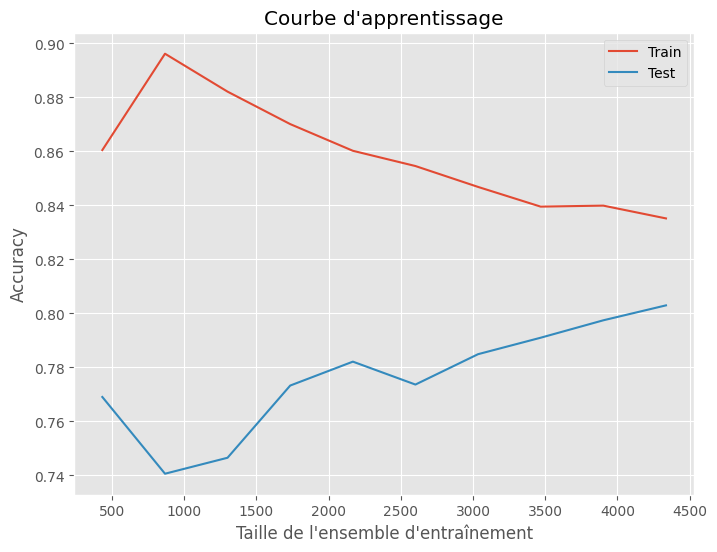

In [200]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
# Calcul de la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model, X_encoded, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculez les moyennes des scores pour chaque taille d'ensemble d'entraînement
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Tracez la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Test')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Accuracy')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()

On observe ici que les performances sur nos données d'apprentissage et de test sont très proches à mesure que l'on augmente la taille de l'échantillon.

4.15 Creation d'un cluster qui sépare nos films en deux groupes homogènes en fonction du budget,des revenues et ainsi que des votes

In [201]:
data_pour_cluster = df[["gross","budget","score"]]

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data_pour_cluster),columns=data_pour_cluster.columns)

kmeans= KMeans(n_clusters=2,random_state=36)
partition = kmeans.fit_predict(data)
y=partition





c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4.15.1 Visualisation les clusters



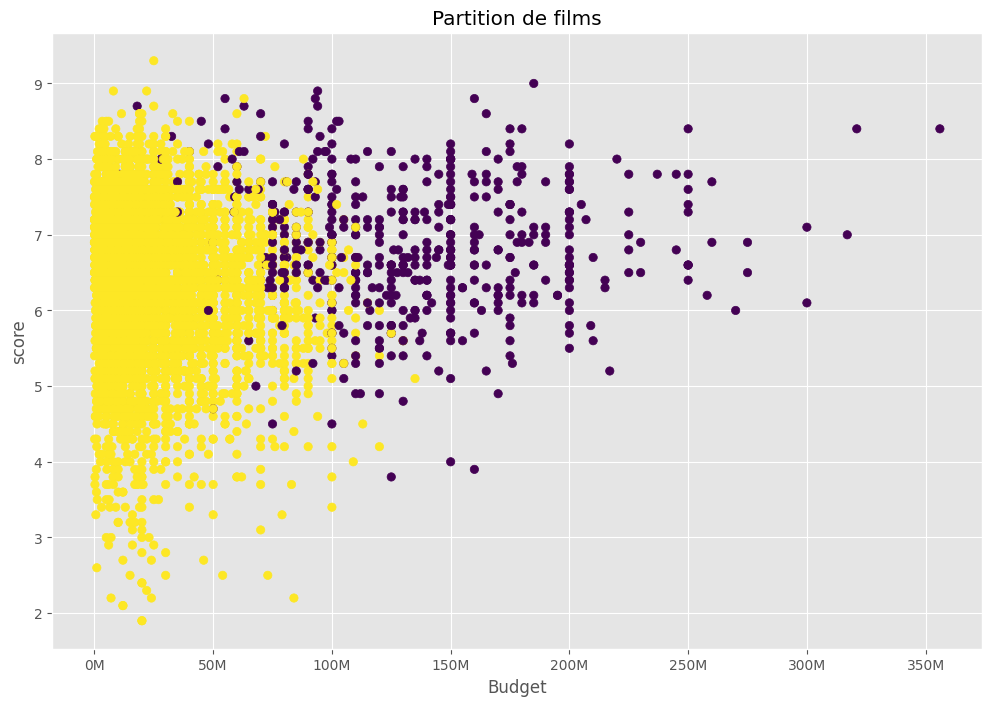

In [202]:
# a. Selon les budget et les votes
import matplotlib.ticker as ticker
scale_x = 1e6
ticks_x = ticker.FuncFormatter(lambda x, pos: f'{x/scale_x:.0f}M')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.scatter(data_pour_cluster['budget'], data_pour_cluster['score'], c= partition, cmap='viridis')
plt.xlabel('Budget')
plt.ylabel('score')
plt.title('Partition de films')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


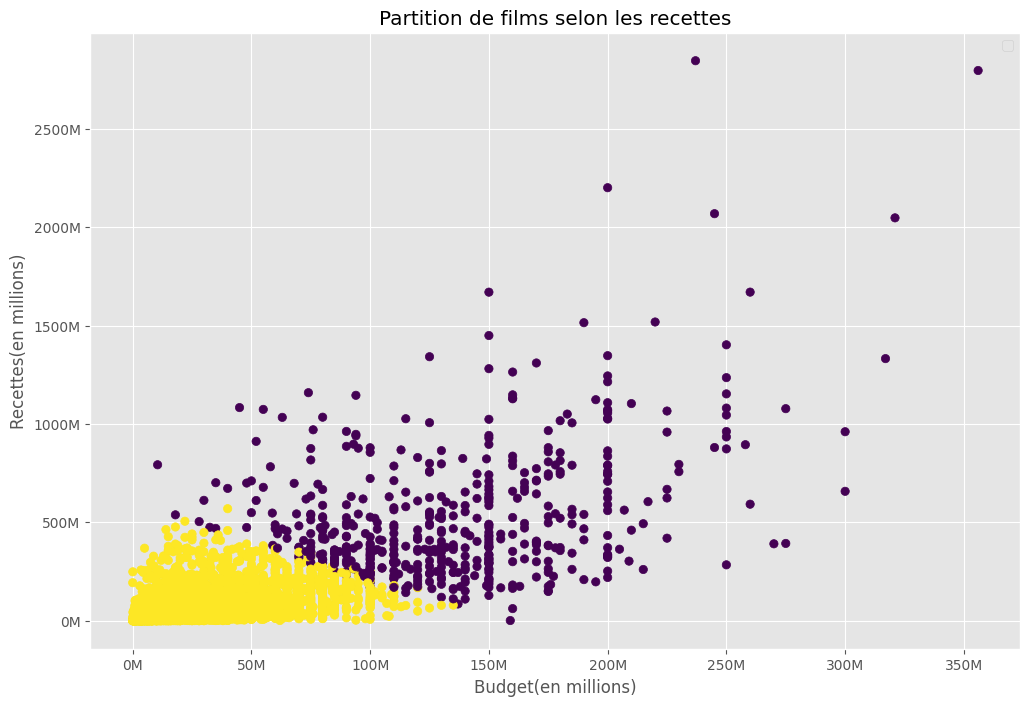

In [203]:
#. Selon le budget et les recettes

scale_y = 1e6

ticks_y = ticker.FuncFormatter(lambda x, pos: f'{x/scale_y:.0f}M')
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.scatter(data_pour_cluster['budget'], data_pour_cluster['gross'], c=partition, cmap='viridis')
plt.xlabel('Budget(en millions)')
plt.ylabel('Recettes(en millions)')
plt.title('Partition de films selon les recettes')
plt.legend()

plt.show()


Analyse des caractéristiques

On constate que l'on peut distinguer deux partitions : 
- Dans la première, on observe que le budget du film est inférieur à 150 millions de dollars et qui ont des recettes n'exédent que pour quelques films(Star Wars: Episode V, E.T., Aladdin, The Lion King, The Sixth Sense, The Passion of the Christ, Fifty Shades of Grey, It ainsi que The Wandering Earth) les 500 millions de dollars.
- Dans la deuxième, on a en majorité ceux dont les budgets sont supérieurs à 100 millions et des recettes supérieurs à 500 millions
On observe également que le budget du film n'a pas vraiment d'impact sur la note qu'obtiendra le film si ce n'est que les films du deuxième groupe ont tendance à avoir des score supérieur à 5.
Le film le miieux noté(The Shawshank Redemption) fait d'ailleurs partie du premier groupe. Une analyse complémentaire peut être nécessaire mais l'on peut se dire que les bons scores des films à petits budgets peut sans doute s'expliquer par le fait qur la plus part peuvent faire partie de ce que l'on appelle des films d'auteurs et sont généralement accueillis différemment des films de genre du fait de leurs faibles budgets marketings.
Le choix de n'avoir que deux partitions a été motivé par le fait que l'agustement avec plusieurs partitions ne donnais pas de partition suffisamment distinguable les uns des autres, on avait des groupes qui etait quasiment confondus.
